# Local Averages

In [1]:
import numpy as np
import scipy as sp
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyApproxTools as pat
importlib.reload(pat)

%matplotlib inline

## Local Averages

Now we are interested in local averages - where we integrate $v(x)$ against some compactly supported molifier function $\varphi_\varepsilon$, that is we find $\int \varphi_{\varepsilon}(x - x_0) v(x) \, \mathrm{d} x$. We find a Riesz representer $\omega_{x_0, \varepsilon}$ of this local integration, that is we define
$$
\langle \omega_{x_0, \varepsilon}, v \rangle = \int \varphi_{\varepsilon}(x - x_0) v(x) \, \mathrm{d} x 
$$

In the case where $\varphi_{\varepsilon} = \mathbb{1}_{[x_0 - \varepsilon/2, x_0 + \varepsilon/2]}$, and our space is $H_0^1([0,1])$, we have that
$$
\omega_{x_0, \varepsilon}(x) = \frac{1}{\sqrt{x_0-\varepsilon/6 + x_0^2}}
\begin{cases}
(1-x_0) x & \text{for } x \le x_0-\varepsilon/2 \\
(1-x_0) x - \frac{1}{2}\frac{(x-(x_0-\varepsilon/2))^2}{\epsilon} & \text{for } x_0 - \varepsilon/2 < x \le x_0+\varepsilon/2 \\
x_0 (1 - x)  & \text{for } x > x_0 + \varepsilon/2
\end{cases}
$$


### Projections

First we just want to see the performance of the projection on to a basis of uniformly spaced local averages for $m\to\infty$ with a variety of $\varepsilon$. We test this against a single function that is made up of sinusoids with random coefficients, i.e.
$$
v(x) = \sum_{k=1}^N \frac{y_k}{1+k^2}\sin(k \pi x)
$$
where $y_k\sim \mathcal{U}([-1,1])$ are IID uniformly distributed.

We then produce, for a variety of $\varepsilon$ (from about $1\times 10^{-2}$ to $1\times 10^{-4}$) a series of evenly spaced local averages as our basis, i.e. we take
$$
W_m = \mathrm{span}\{ \omega_{x_k, \varepsilon} : x_k = \varepsilon/2 + k / m \text{ for } k=0\ldots m-1 \}
$$
for $m$ ranging from 10 to something higher. Note that this allows the local averages to overlap.

We then plot $\| v - P_{W_m} v \|_{H_0^1}$ against $m$ for each choice of $\varepsilon$.

In [2]:
# Lets test with a function made of random sinusoids with decaying coefficients... (i.e. in some)
num_components = 200
np.random.seed(1)
v_c = 2 * np.random.random(num_components) - 1
for i in range(1,num_components+1):
    v_c[i-1] *= 1.0 / (1.0 + i*i)
v = pat.FuncVector(params=[range(1,101)], coeffs=[v_c], funcs=['H1UISin'])

Wm_plot = pat.make_unif_avg_basis(10, 0.05)
v_W, v_c = Wm_plot.project(v, return_coeffs=True)

#epsilons = [5e-2, 2.5e-2, 1e-2, 5e-3, 2.5e-3, 1e-3, 5e-4]
adj = 1 / (100*num_components + 1)
epsilons = [5e-2, 2.5e-2, 1e-2, 5e-3, 2.5e-3, 1e-3, 5e-4]
m_range = range(10,200)
err = np.zeros((len(epsilons), len(m_range)))

# Compute projection error for various epsilon and m
print('Converging uniform local averages for epsilon = ', end='')
for i, epsilon in enumerate(epsilons):
    print(str(epsilon) + '... ', end='')
    for j, m in enumerate(m_range):
        Wm = pat.make_unif_avg_basis(m, epsilon-adj)
        v_W = Wm.project(v)
        err[i,j] = (v - v_W).norm()

Converging uniform local averages for epsilon = 0.05... 0.025... 0.01... 0.005... 0.0025... 0.001... 0.0005... 

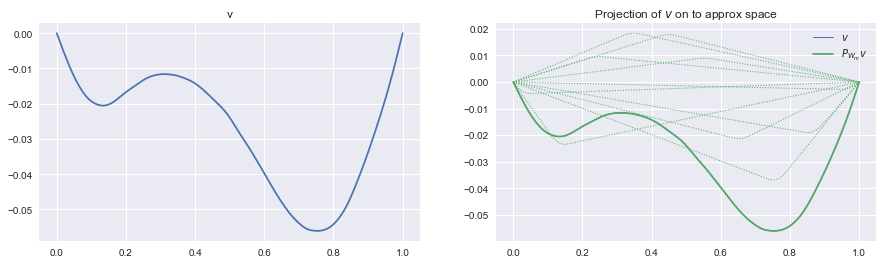

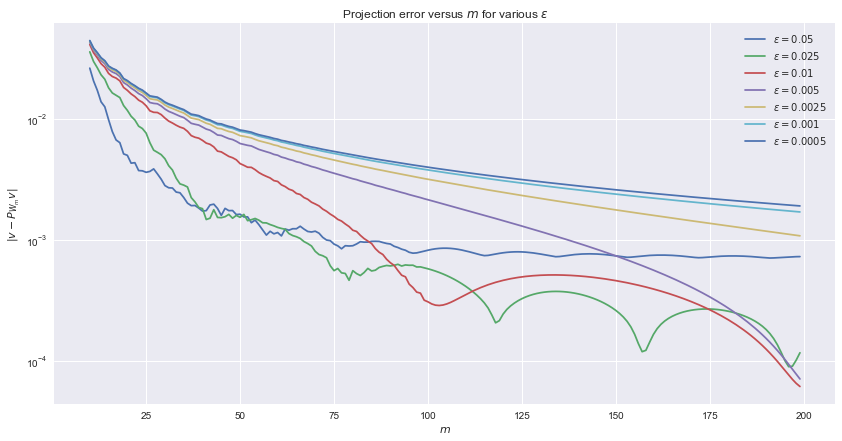

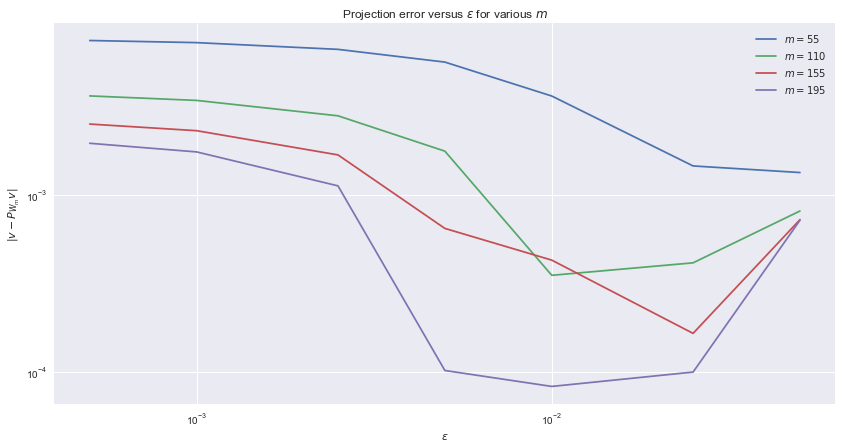

In [3]:
xs = np.arange(0.0, 1.005, 0.005)

sns.set_palette('deep')
cp = sns.color_palette()
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1, title='v')
plt.plot(xs, v.evaluate(xs), label=r'$v$')
ax = fig.add_subplot(1, 2, 2, title='Projection of $v$ on to approx space')
plt.plot(xs, v.evaluate(xs), label=r'$v$', linewidth=1)
plt.plot(xs, v_W.evaluate(xs), label=r'$P_{W_m} v$')
for i in range(Wm_plot.n):
    plt.plot(xs, (Wm_plot.vecs[i].evaluate(xs))*v_c[i], ':', linewidth=1, color=cp[1])
plt.legend()
plt.show()

# Compute projection error for various epsilon and m
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, title=r'Projection error versus $m$ for various $\varepsilon$')
for i, epsilon in enumerate(epsilons):
    plt.semilogy(m_range, err[i,:], label=r'$\varepsilon={{{0}}}$'.format(epsilon))
ax.set(xlabel=r'$m$', ylabel=r'$\|v - P_{W_m} v\|$')
plt.legend()
plt.show()

# Pick some m and plot against epsilon...
ms = [55, 110, 155, 195]
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 1, 1, title=r'Projection error versus $\varepsilon$ for various $m$')
for i, m_sel in enumerate(ms):
    plt.loglog(epsilons, err[:,m_range.index(m_sel)], label=r'$m={{{0}}}$'.format(m_sel))
ax.set(xlabel=r'$\varepsilon$', ylabel=r'$\|v - P_{W_m} v\|$')
plt.legend()
plt.show()

Note that there is a spike in error every time that $\varepsilon = 1/m$... This makes sense, but lets take a closer look at $m=20$ and $m=21$ when $\varepsilon=0.05, just to make sure something isn't going terribly wrong

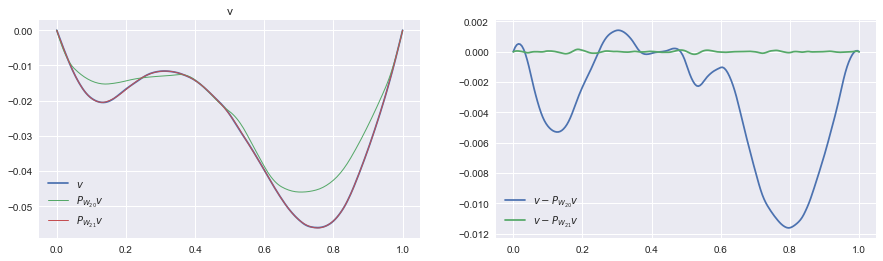

In [4]:
Wm = pat.make_unif_avg_basis(20, 0.05)
v_W, v_c = Wm.project(v, return_coeffs=True)
Wm2 = pat.make_unif_avg_basis(21, 0.05)
v_W2, v_c2 = Wm2.project(v, return_coeffs=True)

xs = np.arange(0.0, 1.005, 0.005)

sns.set_palette("deep",8)
cp = sns.color_palette()
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 2, 1, title='v')
plt.plot(xs, v.evaluate(xs), label=r'$v$')
plt.plot(xs, v_W.evaluate(xs), label=r'$P_{W_{20}} v$', linewidth=1)
plt.plot(xs, v_W2.evaluate(xs), label=r'$P_{W_{21}} v$', linewidth=1)
plt.legend()
ax = fig.add_subplot(1, 2, 2, title='')
plt.plot(xs, (v-v_W).evaluate(xs), label=r'$v - P_{W_{20}} v$')
plt.plot(xs, (v-v_W2).evaluate(xs), label=r'$v - P_{W_{21}} v$')
plt.legend()
plt.show()

### Now we try the Collective OMP and Worst-Case OMP algorithms for this problem

We look at the results both with $\varepsilon=0.01$ and $0.0025$ for both algorithms

In [2]:
N = 1e3
eps_0 = 0.06 # Re run with this
eps_1 = 0.025
eps_2 = 0.01
eps_3 = 0.0025
dictionaries = [pat.make_unif_dictionary(N), pat.make_unif_avg_dictionary(N, eps_0), pat.make_unif_avg_dictionary(N, eps_1),\
                pat.make_unif_avg_dictionary(N, eps_2), pat.make_unif_avg_dictionary(N, eps_3)]

ns = [20,40]
np.random.seed(3)
#n = 20
m = 150
bs_comp = np.zeros((len(ns), m, len(dictionaries)))
bs_wcomp = np.zeros((len(ns), m, len(dictionaries)))
bs_rand = np.zeros((len(ns), m))
bs_avg = np.zeros((len(ns), m))

Vn = pat.make_sin_basis(ns[-1])
Wms_comp = []
Wms_wcomp = []
Wms_avg = []
Wms_rand = []

for k, dictionary in enumerate(dictionaries):
    for j, n in enumerate(ns):

        #gbc = pat.CollectiveOMP(m, dictionary, Vn.subspace(slice(0,n)), verbose=True)
        #Wm_comp = gbc.construct_basis()
        #Wms_comp.append(Wm_comp)
        #Wm_comp_o = Wm_comp.orthonormalise()

        wcgbc = pat.WorstCaseOMP(m, dictionary, Vn.subspace(slice(0,n)), verbose=True)
        Wm_wcomp = wcgbc.construct_basis()
        Wms_wcomp.append(Wm_wcomp)
        Wm_wcomp_o = Wm_wcomp.orthonormalise()

        # For efficiency it makes sense to compute the basis pair and the associated
        # cross-gramian only once, then sub sample it as we grow m...
        #BP_comp_l = pat.BasisPair(Wm_comp_o, Vn.subspace(slice(0,n)))
        BP_wcomp_l = pat.BasisPair(Wm_wcomp_o, Vn.subspace(slice(0,n)))

        for i in range(n, m):
            #BP_comp = BP_comp_l.subspace(Wm_indices=slice(0,i))
            #bs_comp[j, i, k] = BP_comp.beta()

            BP_wcomp =  BP_wcomp_l.subspace(Wm_indices=slice(0,i))
            bs_wcomp[j, i, k] = BP_wcomp.beta()

for j, n in enumerate(ns):

    Wm_rand = pat.make_random_delta_basis(m)
    Wms_rand.append(Wm_rand)
    Wm_rand_o = Wm_rand.orthonormalise()

    # For efficiency it makes sense to compute the basis pair and the associated
    # cross-gramian only once, then sub sample it as we grow m...
    BP_rand_l = pat.BasisPair(Wm_rand_o, Vn.subspace(slice(0,n)))

    for i in range(n, m):
        BP_rand = BP_rand_l.subspace(Wm_indices=slice(0,i))
        bs_rand[j, i] = BP_rand.beta()



Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.1535379542068806
2 : 	 0.23725663206188435
3 : 	 0.322581908262289
4 : 	 0.18747875804312494
5 : 	 0.34871987148815287
6 : 	 0.24208193260348265
7 : 	 0.24454226326855957
8 : 	 0.190394415832625
9 : 	 0.20154268555130936
10 : 	 0.14632506003971368
11 : 	 0.17758165745102872
12 : 	 0.17542391100909357
13 : 	 0.16937913718318356
14 : 	 0.2770955984247501
15 : 	 0.267996623256413
16 : 	 0.2805162013249998
17 : 	 0.23593280073124717
18 : 	 0.16580579661652148
19 : 	 0.1499893390367136
20 : 	 0.15291048834334425
21 : 	 0.11775307094605461
22 : 	 0.10337371083642333
23 : 	 0.14962743187876393
24 : 	 0.09911943879506252
25 : 	 0.07624200910707177
26 : 	 0.0835419003581041
27 : 	 0.07063614253497187
28 : 	 0.08076787503290442
29 : 	 0.08278455763346082
30 : 	 0.07091946101839511
31 : 	 0.06962401125088019
32 : 	 0.0758314822212936
33 : 	 0.08846703407402506
34 : 	 0.09812533346301332
35 : 	 0.0804349

141 : 	 0.0059218790596148735
142 : 	 0.006347642419924672
143 : 	 0.006543369645082273
144 : 	 0.009694525908612903
145 : 	 0.008399845557379146
146 : 	 0.0060576116471894315
147 : 	 0.005781542749715499
148 : 	 0.005956149671663746
149 : 	 0.00646640139968125


Done!


Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.07833854912693985
2 : 	 0.12121919047665985
3 : 	 0.20454390369387207
4 : 	 0.13543864598636549
5 : 	 0.25163938504745925
6 : 	 0.19016200095895094
7 : 	 0.15976317681329538
8 : 	 0.12367880883829929
9 : 	 0.14002026698333628
10 : 	 0.13742246891742554
11 : 	 0.13048444414472168
12 : 	 0.17578468758421273
13 : 	 0.16420834134950052
14 : 	 0.1239946842908891
15 : 	 0.2042993774029962
16 : 	 0.19783197580072626
17 : 	 0.16319899863465426
18 : 	 0.16217883727322488
19 : 	 0.08842927448302158
20 : 	 0.0433270580785268
21 : 	 0.03899491930867226
22 : 	 0.03579316357210292
23 : 	 0.021538916984059284
24 : 	 0.023376812394232033
25 : 

121 : 	 0.001448860421084846
122 : 	 0.0014384224140362829
123 : 	 0.001437401325549968
124 : 	 0.001434100513992545
125 : 	 0.0014330548645527528
126 : 	 0.0014088105916971426
127 : 	 0.0014062775748833088
128 : 	 0.0013989778821335444
129 : 	 0.0013891179986396398
130 : 	 0.0013861973550673406
131 : 	 0.0013813041374162957
132 : 	 0.0013596602857073993
133 : 	 0.0013660270609747362
134 : 	 0.00136373683581978
135 : 	 0.0013489138369512158
136 : 	 0.0013445313741474976
137 : 	 0.0013419982201783622
138 : 	 0.001341116062843848
139 : 	 0.00133402511901171
140 : 	 0.0013260061560593762
141 : 	 0.0013287131524099426
142 : 	 0.001322643931717001
143 : 	 0.0013225881406270872
144 : 	 0.0013177334000526726
145 : 	 0.0013141220174693025
146 : 	 0.00130513030541338
147 : 	 0.0013041291689835058
148 : 	 0.0013024393320174
149 : 	 0.001295770590753813


Done!


Generating basis from greedy algorithm with dictionary: 
i 	 || P_Vn (w - P_Wm w) ||
1 : 	 0.15937284686876843
2 : 	 0.2349878275330264

105 : 	 0.00321448521816748
106 : 	 0.0031817977795046692
107 : 	 0.0031228538264195804
108 : 	 0.0030623393437052976
109 : 	 0.00296407426452705
110 : 	 0.0028914218474868636
111 : 	 0.002856999988750872
112 : 	 0.002810196688962985
113 : 	 0.0028179397075089457
114 : 	 0.0027827462939269687
115 : 	 0.0027527244786796357
116 : 	 0.0026567350223882236
117 : 	 0.002598242845211568
118 : 	 0.0024390544045093387
119 : 	 0.002416296638875992
120 : 	 0.0023850718216978095
121 : 	 0.0024131915001320836
122 : 	 0.0023969621976563243
123 : 	 0.0023676458205754147
124 : 	 0.0024171776974406672
125 : 	 0.002353117688117138
126 : 	 0.002295081486799473
127 : 	 0.0021359519775447644
128 : 	 0.0021484914834288688
129 : 	 0.0021364256567174833
130 : 	 0.002450501451939119
131 : 	 0.0024456926623021985
132 : 	 0.002169233705011736
133 : 	 0.0020793805214457395
134 : 	 0.0020377527443447355
135 : 	 0.0020038770438507427
136 : 	 0.0019657202231377346
137 : 	 0.0019445098181950504
138 : 	 0.001923534140

91 : 	 0.012273960763913655
92 : 	 0.006504212693238129
93 : 	 0.004886619629862796
94 : 	 0.006412630062607713
95 : 	 0.0111604481295976
96 : 	 0.005678651623122005
97 : 	 0.008343542666616216
98 : 	 0.003969111420431437
99 : 	 0.00937578907603861
100 : 	 0.005060861771110647
101 : 	 0.007490709403466217
102 : 	 0.010725279432785062
103 : 	 0.010064716215414937
104 : 	 0.00350564336318325
105 : 	 0.005742725727640452
106 : 	 0.002724476605401413
107 : 	 0.002654003896242152
108 : 	 0.00295000596488712
109 : 	 0.002126542910329321
110 : 	 0.001854401130496966
111 : 	 0.002151798005548683
112 : 	 0.0018837275369744857
113 : 	 0.0018555043681794114
114 : 	 0.0015515054299152717
115 : 	 0.002538622592918198
116 : 	 0.0013789306021718267
117 : 	 0.0014359645381706032
118 : 	 0.0016125278523973774
119 : 	 0.0013427242621941171
120 : 	 0.001325242921617606
121 : 	 0.001504624345978891
122 : 	 0.001996738641844062
123 : 	 0.0016692219331927703
124 : 	 0.0015271223662808022
125 : 	 0.000991239

80 : 	 0.024325505500939842
81 : 	 0.019961018128148267
82 : 	 0.01597067973971568
83 : 	 0.011524820750243067
84 : 	 0.012259618233009154
85 : 	 0.024444519537989595
86 : 	 0.015965246979916276
87 : 	 0.012800837371516528
88 : 	 0.015033812066868601
89 : 	 0.012828462560415171
90 : 	 0.019944247934835763
91 : 	 0.01430129401114242
92 : 	 0.025791066159796885
93 : 	 0.02046970259527106
94 : 	 0.018236698652591712
95 : 	 0.021772524122292747
96 : 	 0.013920355081735059
97 : 	 0.012474330103712725
98 : 	 0.012003692000924014
99 : 	 0.021254642119220957
100 : 	 0.014952036578399705
101 : 	 0.02866529242357385
102 : 	 0.011356375381409906
103 : 	 0.010177087585088562
104 : 	 0.009569777171907648
105 : 	 0.017979431337640087
106 : 	 0.013622486208269733
107 : 	 0.010341335887998016
108 : 	 0.00836602704273489
109 : 	 0.0069432310995756336
110 : 	 0.009187167116587694
111 : 	 0.008396368738491429
112 : 	 0.011602076493335278
113 : 	 0.00666474634798328
114 : 	 0.008960969101365096
115 : 	 0.

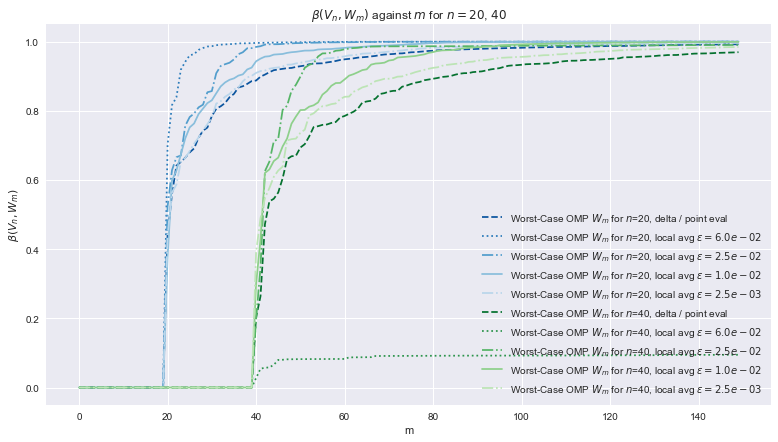

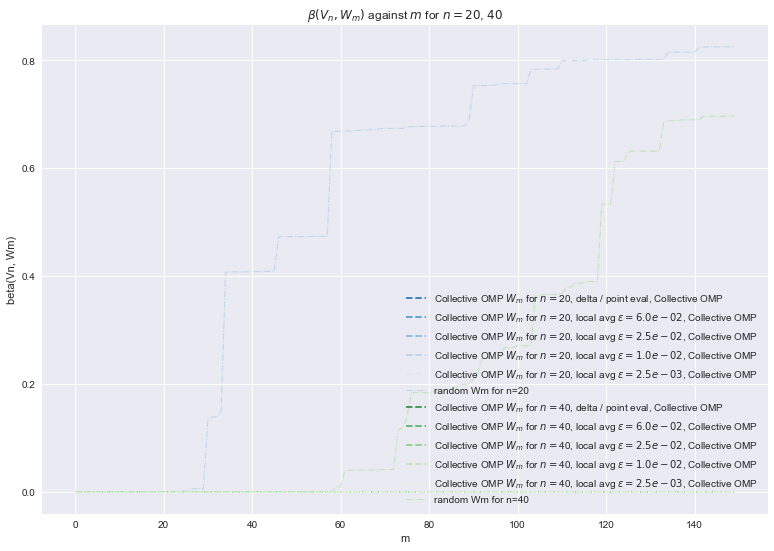

In [8]:
dict_label = [r'delta / point eval', r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_0), r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_1), r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_2), r'local avg $\varepsilon={{{0:0.1e}}}$'.format(eps_3)]
line_style = ['--', ':', '-.', '-', '-.']
pals = [ 'Blues_r', 'Greens_r', 'Reds_r', 'Purples_r']
axs = []
fig = plt.figure(figsize=(13, 7))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n=20$, $40$')#, title=r'$\beta(V_n, W_m)$ against $m$ for various $n$')
for i, n in enumerate(ns):
    sns.set_palette(pals[i])
    cp = sns.color_palette()
    for k, dictionary in enumerate(dictionaries):
        plt.plot(range(m), bs_wcomp[i, :, k], line_style[k], label=r'Worst-Case OMP $W_m$ for $n$={0}, {1}'.format(n, dict_label[k]), color=cp[k])

ax.set(xlabel='m', ylabel=r'$\beta(V_n, W_m)$')#r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=4)
plt.savefig('WCOMPAvgVsDelta.pdf')
plt.show()

fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(1, 1, 1, title=r'$\beta(V_n, W_m)$ against $m$ for $n=20$, $40$')#, title=r'$\beta(V_n, W_m)$ against $m$ for various $n$')
for i, n in enumerate(ns):
    sns.set_palette(pals[i])
    cp = sns.color_palette() 
    for k, dictionary in enumerate(dictionaries):
        plt.plot(range(m), bs_comp[i, :, k], '--', label=r'Collective OMP $W_m$ for $n=${0}, {1}, Collective OMP'.format(n, dict_label[k]), color=cp[k+1])
    plt.plot(range(m), bs_rand[i, :], '-.', label=r'random Wm for n={0}'.format(n), color=cp[k], lw=1)

ax.set(xlabel='m', ylabel='beta(Vn, Wm)')#r'$m$', ylabel=r'$\beta(V_n, W_m)$')
plt.legend(loc=4)
plt.show()